/home/cristinvivian/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:101: MatplotlibDeprecationWarning: The griddata function was deprecated in Matplotlib 2.2 and will be removed in 3.1. Use scipy.interpolate.griddata instead.


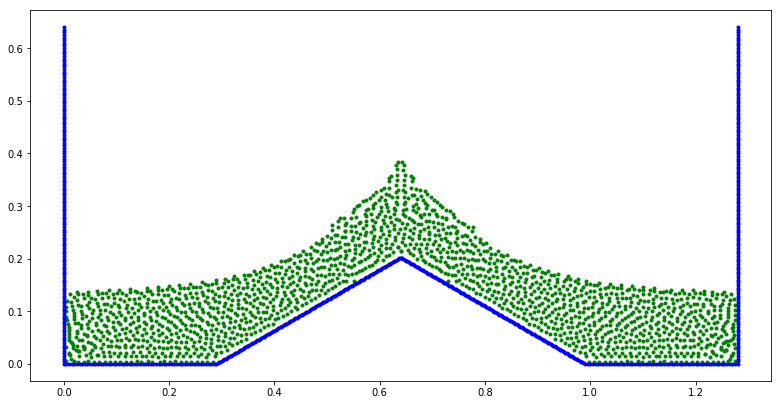

In [88]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib.mlab import griddata
from numpy.random import uniform
import matplotlib.tri as tri
#from mpl_toolkits.basemap import Basemap, shiftgrid
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

npts = 1800
#total number of fluid particles
#steps=2000
xl = 1.28#size of the domain, divided by 2
yl = 0.64

dx = xl/128
data1 = np.loadtxt('../data/f_xv.dat')
data0 = np.loadtxt('../data/ini_xv.dat')
data2 = np.loadtxt('../data/xv_vp.dat',skiprows=1)
data3 = np.loadtxt('../data/kernel.dat')
exdata = np.loadtxt('../data/f_state.dat')
data4 = np.loadtxt('../data/record.dat')
data5 = np.loadtxt('../data/ini_virt.dat')
data6 = np.loadtxt('../data/f_other.dat')
data7 = np.loadtxt('../data/state_vp.dat')

x0 = data0[:,1]
y0 = data0[:,2]
x2 = data1[:,1]
y2 = data1[:,2]
u2 = data1[:,3]
v2 = data1[:,4]
x3 = data2[:,1]
y3 = data2[:,2]
u3 = data2[:,3]
v3 = data2[:,4]
x5 = data5[:,1]
y5 = data5[:,2]
kernel1 = data3[:npts,1]
itype = data6[:,1]
#kernel2 = data3[npts:,1]
#hp = 0.
xx = []
yy = []
pp = []
vv = []

recoer = []
pressure = exdata[:,3]
#print(pressure)
#pvp = data7[:,3]
#hydro = exdata[:,3]
velocity = np.zeros(len(y2))
density = exdata[:,2]
#energy = exdata[:,4]
#normarlized pressure
for i in range(len(x2)):
#    hydro[i] = 9.8*1000*(yl-y2[i])
    velocity[i] = np.sqrt(u2[i]**2+v2[i]**2)
    density[i] = density[i]/1000
#    if itype[i]==0:
#        recoer.append(i)
    if x2[i]>=xl/2:
        xx.append(x2[i])
        yy.append(y2[i])
        pp.append(pressure[i])
        vv.append(velocity[i])
#print(recoer)        
fig, ax = plt.subplots(figsize=(15, 15))

#for i in range(20):
#    p1[i] = exdata[741+2*i,3]
#ax.set_title('wcsph results, fluid particle:%d,timestep:%d'%(npts,steps))
init = plt.subplot(211,aspect=1.0)
#init.plot
#for i in range(len(x0)):
#    dis = np.sqrt((x0[i]-x0[7554])**2+(y0[i]-y0[7554])**2)
#    if i==3232 or i==4159:
#        init.plot(x2[i],y2[i],'.r')
##    elif i==7554 or i==7555:
#        init.plot(x2[i],y2[i],'.b')
#   else:
#init.plot(x0,y0,'.g',x5,y5,'.b')
init.plot(x2,y2,'.g',x3,y3,'.b')
#for i in range(len(recoer)):
#    init.plot(x2[recoer[i]],y2[recoer[i]],'.g')
#for i in range(len(x2)):
#    if x2[i]<=1.04:
#        init.plot(x2[i],y2[i],'.b')
#init.plot(x2[7554],y2[7554],'.b')
#init.plot(x2[7555],y2[7555],'.b')

#init.set_title('particle position')
#triang = tri.Triangulation(x2, y2)
#interpolator = tri.LinearTriInterpolator(triang, pressure)
#Xi, Yi = np.meshgrid(xi, yi)
#zi = interpolator(Xi, Yi)
xi = np.linspace(xl/2,xl,64)
yi = np.linspace(0,yl,64)
zi = griddata(xx,yy,pp,xi,yi,interp='linear')
# contour the gridded data, plotting dots at the randomly spaced data points.
#CS = plt.subplot(223,aspect=1.0)
#im2 = CS.plot(x2,y2,10,pressure,cmap='jet')
#im2 = CS.contourf(xi, yi, zi, 200, cmap='jet')
#cntr1 = ax1.contourf(xi, yi, zi, 200, cmap="jet")
#im2 = CS.contourf(xi,yi,zi,200,cmap=plt.cm.jet)
#im2 = CS.contourf(xii,yi,zii,200,cmap=plt.cm.jet)
#im2 = CS.scatter(x2,y2,30,pressure,cmap='jet')
#fmt = ticker.LogFormatterMathtext()
#fmt.create_dummy_axis()
#CS.clabel(im2, im2.levels[::2])
#cbaxes = inset_axes(CS, width="60%", height="5%", loc=9) 
#plt.colorbar(im2,cax=cbaxes, orientation='horizontal')
#fig.colorbar(im2, ax=CS, orientation='horizontal',pad=0.05)
#fig.colorbar(im2,ax = CS, pad=0.05)
#CS.set_title('pressure field') #both contour & scatter are used

#vel = plt.subplot(224, aspect =1.0)
#im3 = vel.scatter(xx,yy,30,vv)
#vel.scatter(x3,y3,10,kernel2)
#vel.set_title('kernel scatter')
#print(kernel1[7380])

#zii = griddata(xx,yy,vv,xi,yi,interp='linear')
#vel.contourf(xi, yi, zii, 200, cmap='jet')
#wedge_x = np.linspace(0.65,0.765,20)
#wedge_y = -np.sqrt(3)*(wedge_x-0.765)
#vel.plot(wedge_x,wedge_y,'.b')
#vel.quiver(x2,y2,u2,v2)
#vel.quiver(x3,y3,u3,v3)
#vel.quiver(x3[809],y3[809],u3[809],v3[809])
#vel.set_title('velocity field')

# write pressure at the center line into txtfile
#err_p = LA.norm(hydro-pressure)
#err_v = LA.norm(u2**2+v2**2)/np.sqrt(npts)
#err_d = LA.norm(abs(y2-y0))/np.sqrt(npts)
#print(err_v,err_d)

#den12 = []
#p1 = pressure[78:91]
#print(len(p1))
#p2 = pressure[338:364]
#for i in range(39):
#    den12.append(density[10+39*i])

#mat = np.matrix(den12)
#with open('outfile-2.txt','wb') as f:   
#    for line in mat:
#        np.savetxt(f,line,fmt='%.2f')
        #f.write("%r %r %r\n"%((dx,fmt='%.5f'),(err_p,fmt='%.5f'),(err_d,fmt='%.5f')))

#den = plt.subplot(223,aspect=1.0)
#for i in range(len(x2)):
#    if density[i]<=1000:
#        den.scatter(x2[i],y2[i],density[i]/10)
#im3=den.scatter(x2,y2,10,kernel1)
#fig.colorbar(ax=den,pad=0.05)

#den = plt.subplot(222)
#zii = griddata(x2,y2,density,xi,yi,interp='linear')
#im3 = den.contour(xi,yi,zii,200,cmap=plt.cm.jet)
#fig.colorbar(im3, ax =den,pad=0.05)
#den.set_title('density field')


# fig, ax = plt.subplots(figsize=(10, 10))
CS = plt.subplot(111,aspect=1.0)
zii = griddata(x2,y2,pressure,xi,yi,interp='linear')
#image = plt.contour(xi,yi,zii,200,cmap=plt.cm.jet)
#image.figuresize(20,20)
#fig.colorbar(image,ax = CS,pad=0.05)
plt.scatter(x2,y2,30,pressure,cmap='jet')
#print(pressure)

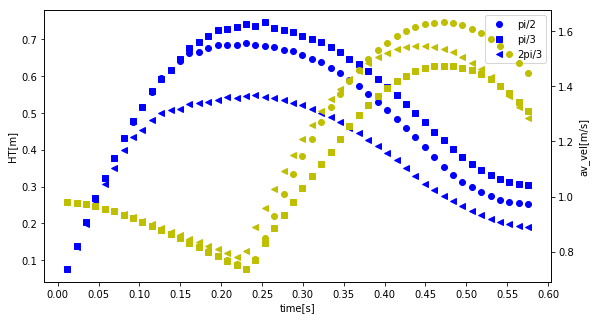

In [89]:
dt = 1.15175e-4
#damp = 2500*dt
#h = 0.515
a = np.sqrt(3)
time = np.linspace(100*dt,5000*dt,50)
#xx = np.linspace(xl/2-h/a,xl/2+h/a, 40)
#yy = h*np.sin(a*np.pi/(2*h)*(xx-(xl/2-h/a)))
#tsuita = 0.5*np.sin((time/damp-0.5)*np.pi)+0.5
#pcenter = data4[:,1]/(h*9800)
#pedge = pressure[0:39]
#av_vel = data4[:,2]
#av_vel_2 = data4[:,2]
av_vel_3 = data4[:,2]
cen_vel = data4[:,3]
#wh_1 = data4[:,5] 
#wh_2 = data4[:,5]
wh_3 = data4[:,5]
fig,ax = plt.subplots(figsize=(20,5))
pads = plt.subplot(121)
#yyaxis left
pads.plot(time,av_vel,'ob',label='pi/2')
pads.plot(time,av_vel_2,'sb',label='pi/3')
pads.plot(time,av_vel_3,'<b',label='2pi/3')
pads.legend()
pads.set_xlabel('time[s]')
pads.set_ylabel('HT[m]')

#yyaxis right
ax = plt.gca()
ax.locator_params("x",nbins=20)
ax2 =plt.twinx()

ax2.set_ylabel('av_vel[m/s]')
ax2.plot(time,wh_1,'oy')
ax2.plot(time,wh_2,'sy')
ax2.plot(time,wh_3,'<y')
#ax2.legend(loc=1)
#pads.plot(time,av_vel_2,'-b',label='pi/3')
#pads.plot(time,wh_2,'-y')
#pads.plot(time,av_vel_3,'-b',label='2pi/3')
#pads.plot(time,wh_3,'-y')

#legend = ax.legend(loc='best', shadow=True, fontsize='large')
#adase = plt.subplot(122)
#adase.plot(time,cen_vel,'-b')
#plt.xlabel('time[s]')
#plt.ylabel('v_center[m/s]')
#plt.title('water level and average velocity changing with different wedge angles')
#print(t)

10 10 1870 1870


Text(0.5, 1.0, 'pressure distribution in y-direction')

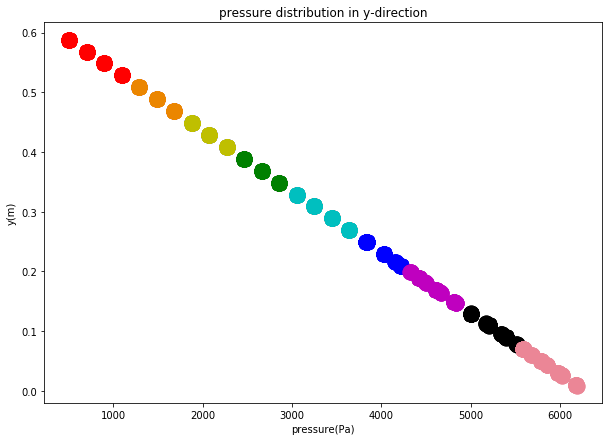

In [64]:
color = ['r','#eb8600','y','g','c','b','m','k','#eb8696','#166396']
fig, ax = plt.subplots(figsize=(10, 7))
m = len(color)
maxp = max(pressure)
minp = min(pressure)

pmap = np.linspace(minp,maxp,m)
print(m,len(pmap),len(pressure),len(y2))
for j in range(m-1):
    for i in range(len(pressure)):
        if (pressure[i]<pmap[j+1]) & (pressure[i]>=pmap[j]):
            ax.plot(pressure[i],y2[i],color[j],marker='o',markersize='15')
            
#fig.colorbar(ax,mappable,pad=0.05)
#ax.plot(pressure[2],y2[2],color[8],marker='*',markersize='15')
plt.xlabel('pressure(Pa)')
plt.ylabel('y(m)')
ax.set_title('pressure distribution in y-direction')

In [57]:
print(10*np.sqrt(0.52*9.8))

22.574321695235938


In [54]:
print(0.6*9800)

5880.0
